# 1.4.2 Image Thresholding
### cv2.threshold, cv2.adaptiveThreshold etc.

In [1]:
# Simple Thresholding

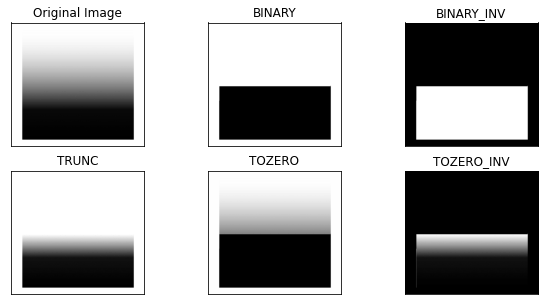

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 임계처리
# 이진화란 영상을 흑/백으로 분류하여 처리하는 것, 기준이 되는 임계값보다 크면 백, 작으면 흑이 된다.
# 이때 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제

img = cv2.imread('gradient.png',0)

# cv2.threshold(이미지, 임계값, 임계값을 넘었을 때 적용할 value, 임계처리 방법)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# ret --> return value
# cv2.THRESH_BINARY: 임계값보다 크면 value, 아니면 0으로 바꾼다.
# cv2.THRESH_BINARY_INV: 임계값보다 크면 0, 아니면 value로 바꾸어 준다.(cv2.THRESH_BINARY의 역)
# cv2.THRESH_TRUNC: 임계값보다 크면 value로 지정, 작으면 기존의 값 그대로 사용한다. 
# cv2.THRESH_TOZERO: 임계값보다 크면 픽셀 값 그대로, 작으면 0으로 할당한다. 
# cv2.THRESH_TOZERO_INV: 임계값보다 크면 0, 작으면 그대로 할당해준다.(cv2.THRESH_TOZERO의 역)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것 (10, 5)
plt.rcParams["figure.figsize"] = (10,5)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [3]:
# Adaptive Thresholding

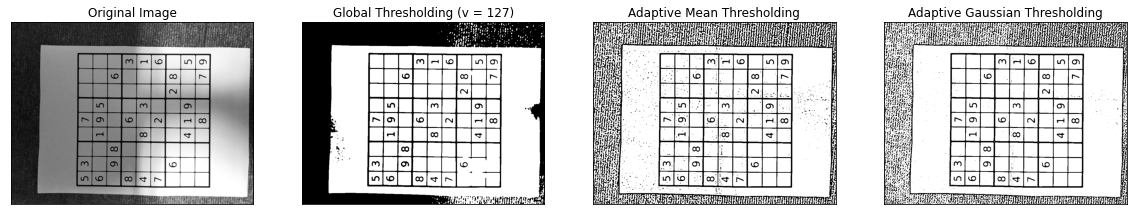

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 적응형 임계처리
# 이미지 전체에 임계값을 사용하지 않고 영역별로 임계처리를 하는 것 

img = cv2.imread('sIMG_2168.jpg', 0)

# cv2.medianBlur(이미지, value)
# ROI 주변으로 지정한 커널 크기(value x value) 내의 픽셀을 크기순으로 정렬한 후 중간값을 뽑아서(평균이 아님에 주의) 픽셀값으로 사용하는 기법
img = cv2.medianBlur(img, 5)

# cv2.threshold(이미지, 임계값, 임계값을 넘었을 때 적용할 value, 임계처리 방법)
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# cv2.adaptiveThreshold(이미지(grayscale), 임계값, 임계처리를 결정하는 계산 방법, 임계처리 방법, 임계처리를 적용할 영역 사이즈, 평균이나 가중평균에서 차감할 값)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# cv2.ADAPTIVE_THRESH_MEAN_C: X, Y를 중심으로 block Size * block Size 안에 있는 픽셀 값의 평균에서 C를 뺸 값을 임계값으로 함
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C: X, Y를 중심으로 block Size * block Size 안에 있는 Gaussian 윈도우 기반 가중치들의 합에서 C를 뺀 값을 임계값으로 한다. 

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것 (10, 5)
plt.rcParams["figure.figsize"] = (20,5)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()


In [5]:
# Otsu’s Binarization

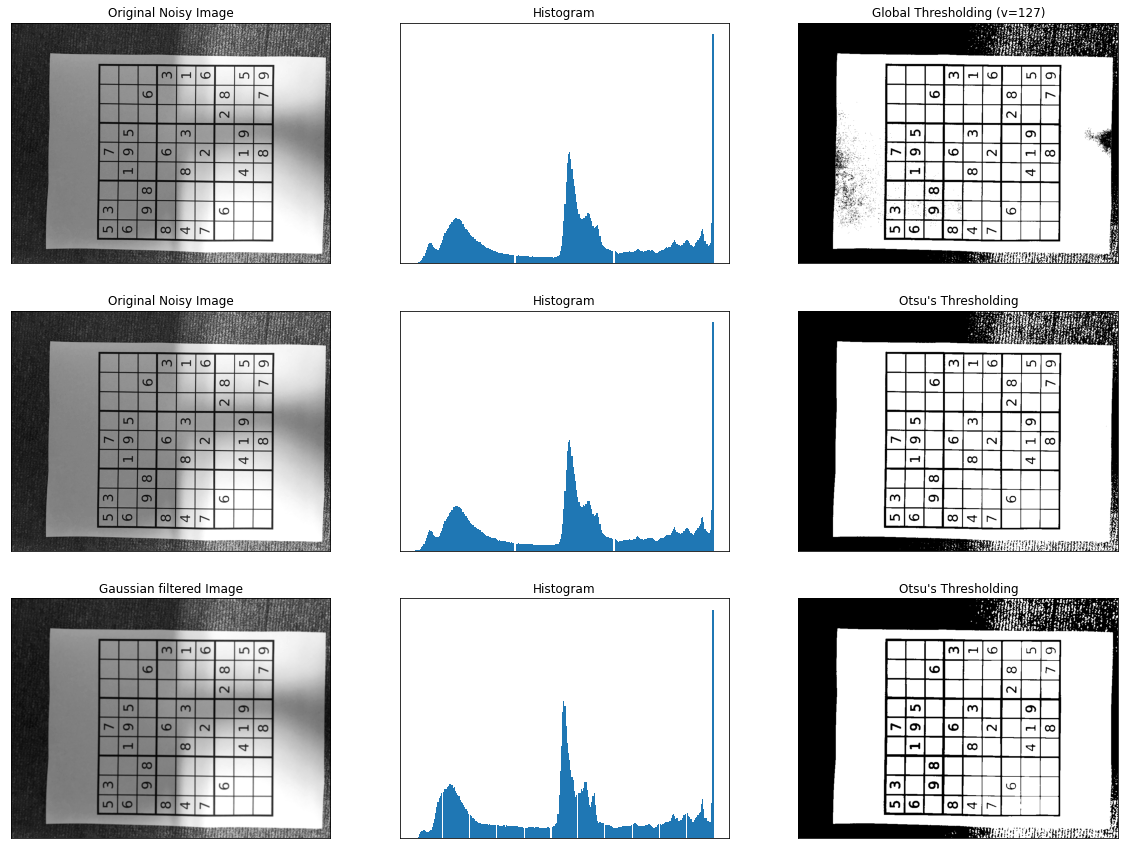

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Otsu의 이진화(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산해주는 것을 말한다.

img = cv2.imread('sIMG_2168.jpg',0)

# global thresholding
# cv2.threshold(이미지, 임계값, 임계값을 넘었을 때 적용할 value, 임계처리 방법)
ret1,th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
# OpenCV에서는 Otsu Binaryzation을 적용하는 단일 함수는 따로 없다.
# cv2.threshold() 함수 적용시 임계처리 방법을 cv2.THRESH_BINARY + cv2.THRESH_OTSU로 설정하고 임계값을 0으로 설정하면 된다.
# cv2.THRESH_BINARY + cv2.THRESH_OTSU 사용 시 cv2.thrshould() 함수가 적절한 임계값을 계산하여 이를 적용한 결과를 리턴한다.
ret2,th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# 가우시안 필터링(블러) 사용 후 Otsu 이진화 적용

# ROI 주변으로 지정한 커널 크기(ksize) 내의 픽셀 중 중심에 있는 픽셀에 높은 가중치를 부여하는 방식
# cv2.GaussianBlur(src, ksize, sigmaX)
# src: 입력 영상. 각 채널 별로 처리됨.
# ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨
# sigmaX: x방향 sigma.

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것 (10, 5)
plt.rcParams["figure.figsize"] = (20,15)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
    
plt.show()

# Histogram을 분석할 줄 알아야한다.
# 픽셀 값을 찾아서 양을 보여주는 것

In [7]:
# How Otsu’s Binarization Works?

In [8]:
# Otsu 이진화가 실행되는 방법

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    
    # calculates the minimization function
    fn = v1*q1 + v2*q2 
    if fn < fn_min:
        fn_min = fn
        thresh = i
        
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 

print(thresh,ret)

70 69.0


<ipython-input-8-fe626a6ac2cf>:26: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-8-fe626a6ac2cf>:26: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-8-fe626a6ac2cf>:27: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
